In [ ]:
import math
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

!pip install yfinance

import pandas_datareader as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

from datetime import date

today = date.today()

data = yf.download('GOOGL',start = '2010-01-01', end=today)

data




[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908488
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003391
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443
2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815771
2010-01-08,296.296295,301.926941,294.849854,301.311310,301.311310,9439151
...,...,...,...,...,...,...
2022-06-17,2120.669922,2173.989990,2100.919922,2142.870117,2142.870117,2555300
2022-06-21,2178.590088,2249.790039,2172.000000,2230.879883,2230.879883,2370800
2022-06-22,2211.129883,2266.929932,2207.649902,2229.750000,2229.750000,1538700


<function matplotlib.pyplot.show>

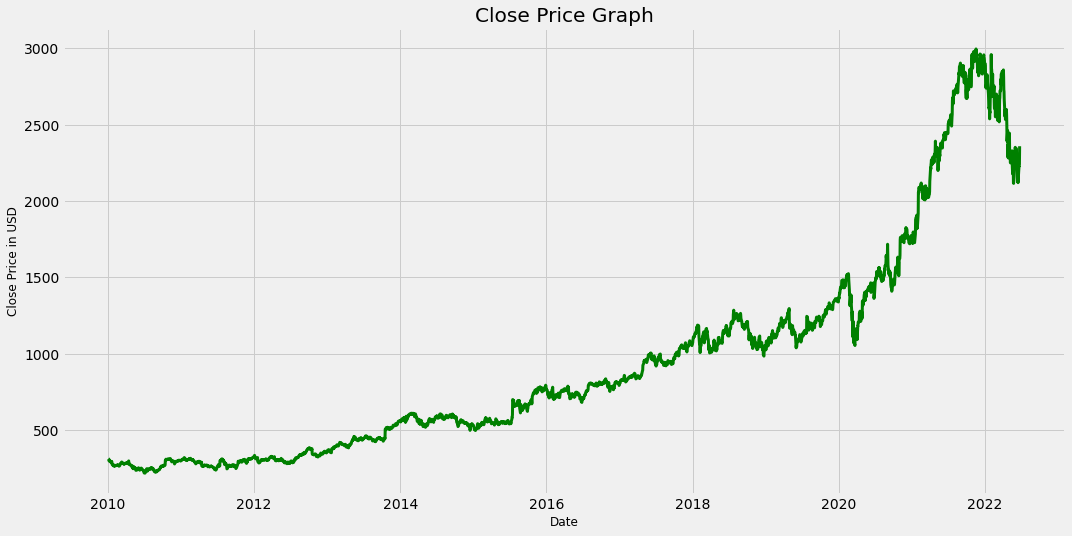

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price Graph')
plt.plot(data['Close'], color = 'green', linewidth =3 , MARKERSIZE = 20)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price in USD', fontsize =12)
plt.show

In [ ]:
dataclose = data.filter(['Close'])
dataclose
dataset = dataclose.values
dataset #converting dataclose to array



array([[ 313.68869019],
       [ 312.30731201],
       [ 304.43444824],
       ...,
       [2229.75      ],
       [2244.84008789],
       [2359.5       ]])

In [ ]:
#training data for LSTM

traindatalen = math.ceil(len(dataset)* .8)
traindatalen


2513

In [ ]:
#scaling the data

Scaler = MinMaxScaler(feature_range=(0,1))
Scaled_Data = Scaler.fit_transform(dataset)

Scaled_Data

array([[0.03434762],
       [0.03385046],
       [0.03101698],
       ...,
       [0.72394623],
       [0.72937722],
       [0.77064381]])

In [ ]:
#train_scaled_data

train_data_scaled = Scaled_Data[0:traindatalen, :]
train_data_scaled

#split train data to x train and y train

x_train = []
y_train = []


for i in range(60,len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])

    if i<=60:
       print(x_train)
       print(y_train)
       print()

[array([0.03434762, 0.03385046, 0.03101698, 0.0284663 , 0.02989295,
       0.02972903, 0.02781422, 0.02720357, 0.02770074, 0.02592643,
       0.02729904, 0.02600029, 0.02646323, 0.02052427, 0.01872114,
       0.01915706, 0.01909942, 0.01769259, 0.01690901, 0.01746382,
       0.01712158, 0.01886886, 0.0163398 , 0.0171522 , 0.01754489,
       0.01807988, 0.01772141, 0.01807267, 0.01748183, 0.01895532,
       0.0183987 , 0.01930118, 0.01885805, 0.01922551, 0.01783309,
       0.01718462, 0.01627675, 0.0163434 , 0.01740438, 0.01891209,
       0.01967945, 0.02134928, 0.02308215, 0.02277052, 0.02235801,
       0.02528697, 0.02613179, 0.02584358, 0.02289662, 0.02326048,
       0.02332532, 0.02347664, 0.02232379, 0.02187346, 0.02034234,
       0.02184284, 0.02284257, 0.02280834, 0.02276511, 0.02353248])]
[0.023606332757390977]



In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2453, 60, 1)

In [ ]:
#Building the LSTM model


model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling the model
model.compile(optimizer ='adam',loss ='mean_squared_error')

In [ ]:
#Training Model

model.fit(x_train,y_train,epochs=1,batch_size=1)

2453/2453 [==============================] - 76s 30ms/step - loss: 2.7112e-04


In [ ]:
#Testing Data Set
test_dataset = Scaled_Data[traindatalen- 60:,:]

#x_test, y_test

x_test =[]
y_test = dataset[traindatalen:,:]

for i in range(60,len(test_dataset)):
  x_test.append(test_dataset[i-60:i,0])

In [ ]:
#Convert data to array


x_test=np.array(x_test)
x_test

array([[0.34538816, 0.34953066, 0.35727937, ..., 0.40754721, 0.40531582,
        0.41180846],
       [0.34953066, 0.35727937, 0.35630404, ..., 0.40531582, 0.41180846,
        0.40899043],
       [0.35727937, 0.35630404, 0.34978258, ..., 0.41180846, 0.40899043,
        0.40361704],
       ...,
       [0.94122402, 0.93965848, 0.94721647, ..., 0.68468785, 0.69267779,
        0.72435288],
       [0.93965848, 0.94721647, 0.94313513, ..., 0.69267779, 0.72435288,
        0.72394623],
       [0.94721647, 0.94313513, 0.92246945, ..., 0.72435288, 0.72394623,
        0.72937722]])

In [ ]:
#Reshape to 3D 

x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

x_test.shape

#predictions

pred = model.predict(x_test)
pred = Scaler.inverse_transform(pred)

In [ ]:
#Root Mean Squared Error Test lower values means better fit

RMS =np.sqrt(np.mean(pred-y_test)**2)
RMS

34.62253254689988

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


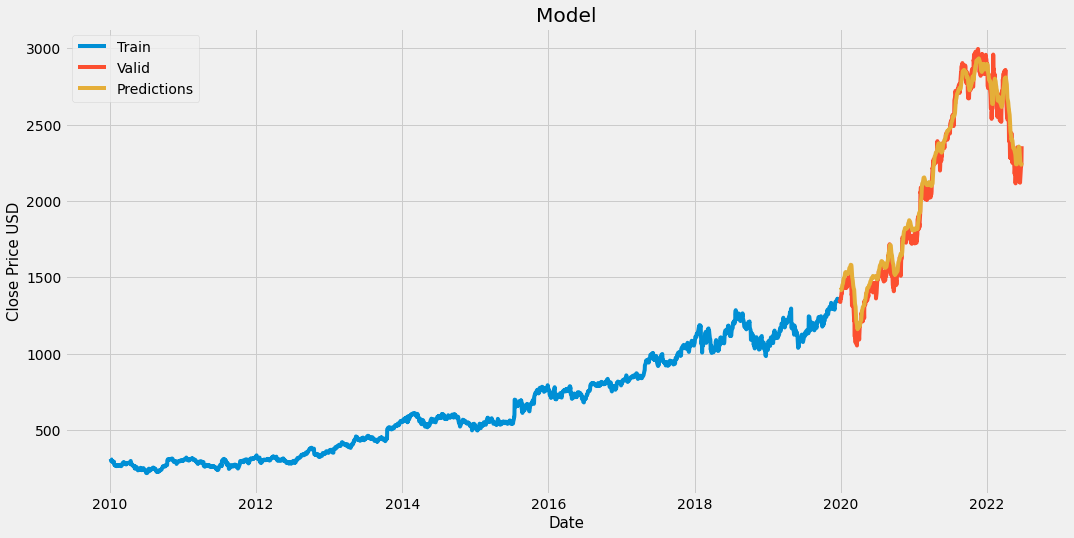

In [ ]:
#pLOT DATA

TRAIN = data[:traindatalen]
Valid = data[traindatalen:]
Valid['Predictions'] = pred

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD',fontsize=15)
plt.plot(TRAIN['Close'])
plt.plot(Valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'])




In [ ]:
#Valid

print(Valid)


#Predicting for next data

data1 = yf.download('GOOGL',start = '2010-01-01', end=today)

data1df = data1.filter(['Close'])

lastsixttydays = data1df[-60:].values

lastsixttydays = Scaler.transform(lastsixttydays)

Xtest=[]

Xtest.append(lastsixttydays)

Xtest = np.array(Xtest)

Xtest = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1)) 

predprice = model.predict(Xtest)

predprice = Scaler.inverse_transform(predprice)

predprice

print(predprice)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-12-27  1364.000000  1367.050049  1353.000000  1354.640015  1354.640015   
2019-12-30  1356.810059  1357.000000  1337.839966  1339.709961  1339.709961   
2019-12-31  1335.790039  1340.660034  1332.130005  1339.390015  1339.390015   
2020-01-02  1348.410034  1368.680054  1346.489990  1368.680054  1368.680054   
2020-01-03  1348.000000  1373.750000  1347.319946  1361.520020  1361.520020   
...                 ...          ...          ...          ...          ...   
2022-06-17  2120.669922  2173.989990  2100.919922  2142.870117  2142.870117   
2022-06-21  2178.590088  2249.790039  2172.000000  2230.879883  2230.879883   
2022-06-22  2211.129883  2266.929932  2207.649902  2229.750000  2229.750000   
2022-06-23  2244.629883  2254.850098  2210.010010  2244.840088  2244.840088   
2022-06-24  2259.899902  2361.580078  2259.050049  2